In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats#for statistical asnlysis
data = pd.read_excel('C:/Users/dell/OneDrive/Documents/Titanic data for data science/World Happiness Report 2013.xlsx')
data.head()

,Country,Region,Ladder,Social Support,Freedom,Corruption,Donation,Generosity,Positive Affect,Negative Affect,Happiness (Yesterday),GDP per capita,Healthy life expectancy
0,Afghanistan,4,4.040,0.525,0.540,0.755,0.348,0.207,0.663,0.270,0.721,979.0,36.535
1,Albania,1,5.550,0.759,0.553,0.827,0.112,-0.192,0.627,0.276,0.568,7652.0,61.417
2,Algeria,8,5.422,0.831,0.551,0.681,0.106,-0.194,0.567,0.245,0.542,7547.0,61.722
3,Angola,9,5.589,0.723,0.584,0.912,0.322,0.046,0.659,0.361,0.708,5172.0,34.601
4,Argentina,6,6.562,0.906,0.764,0.810,0.199,-0.150,0.847,0.238,0.813,14379.0,65.543


In [3]:
data.shape

(156, 13)

In [4]:
data.isnull().sum()

Country                    0
Region                     0
Ladder                     0
Social Support             0
Freedom                    0
Corruption                 0
Donation                   0
Generosity                 0
Positive Affect            0
Negative Affect            0
Happiness (Yesterday)      0
GDP per capita             0
Healthy life expectancy    1
dtype: int64

# Exploratory Data Analysis

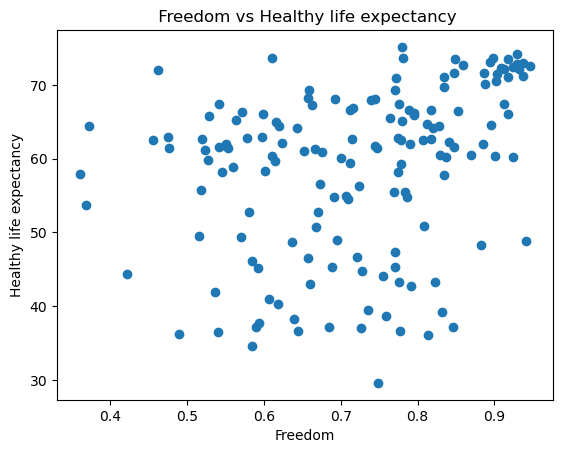

In [5]:
plt.scatter(data['Freedom'], data['Healthy life expectancy'])
plt.xlabel('Freedom')
plt.ylabel('Healthy life expectancy')
plt.title(' Freedom vs Healthy life expectancy')
plt.show()

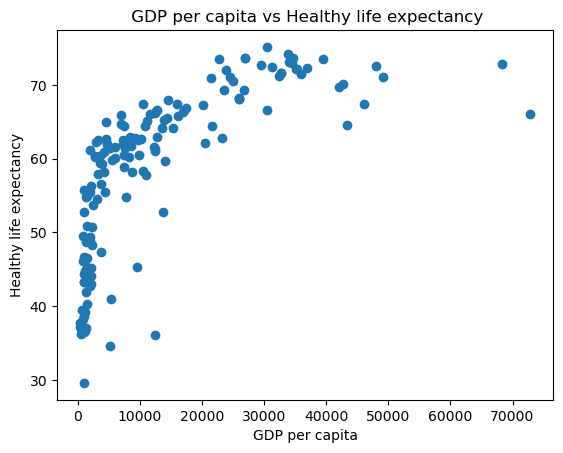

In [6]:
import matplotlib.pyplot as plt

# Assuming you have a dataframe 'data' with columns X_column and y_column
# You can replace 'X_column' and 'y_column' with the actual column names from your dataframe

# Plot X_column against y_column
plt.scatter(data['GDP per capita'], data['Healthy life expectancy'])
plt.xlabel('GDP per capita')
plt.ylabel('Healthy life expectancy')
plt.title(' GDP per capita vs Healthy life expectancy')
plt.show()


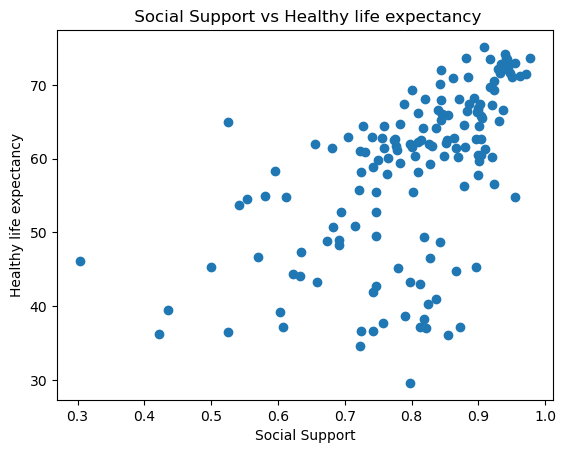

In [7]:
plt.scatter(data['Social Support'], data['Healthy life expectancy'])
plt.xlabel('Social Support')
plt.ylabel('Healthy life expectancy')
plt.title(' Social Support vs Healthy life expectancy')
plt.show()

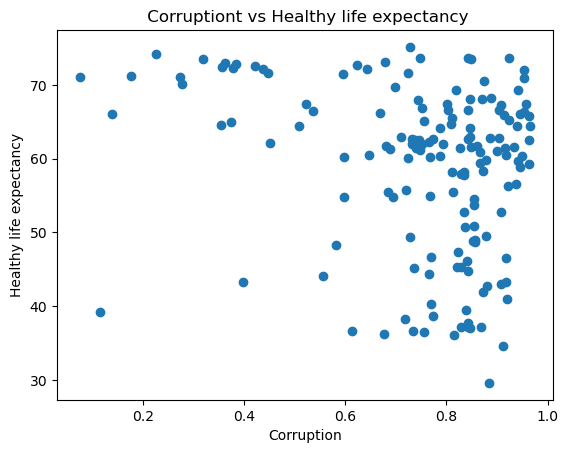

In [8]:
plt.scatter(data['Corruption'], data['Healthy life expectancy'])
plt.xlabel('Corruption')
plt.ylabel('Healthy life expectancy')
plt.title(' Corruptiont vs Healthy life expectancy')
plt.show()

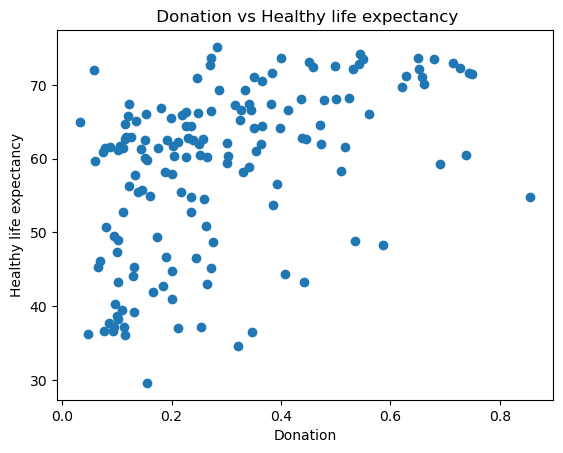

In [9]:
plt.scatter(data['Donation'], data['Healthy life expectancy'])
plt.xlabel('Donation')
plt.ylabel('Healthy life expectancy')
plt.title(' Donation vs Healthy life expectancy')
plt.show()

# MODEL PREPAREATION

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  156 non-null    object 
 1   Region                   156 non-null    int64  
 2   Ladder                   156 non-null    float64
 3   Social Support           156 non-null    float64
 4   Freedom                  156 non-null    float64
 5   Corruption               156 non-null    float64
 6   Donation                 156 non-null    float64
 7   Generosity               156 non-null    float64
 8   Positive Affect          156 non-null    float64
 9   Negative Affect          156 non-null    float64
 10  Happiness (Yesterday)    156 non-null    float64
 11  GDP per capita           156 non-null    float64
 12  Healthy life expectancy  155 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 16.0+ KB


In [11]:
dummies=pd.get_dummies(data.Country)
d1=pd.concat([data,dummies.drop('Afghanistan',axis='columns')],axis='columns')
d1.head()

,Country,Region,Ladder,Social Support,Freedom,Corruption,Donation,Generosity,Positive Affect,Negative Affect,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Afghanistan,4,4.040,0.525,0.540,0.755,0.348,0.207,0.663,0.270,...,False,False,False,False,False,False,False,False,False,False
1,Albania,1,5.550,0.759,0.553,0.827,0.112,-0.192,0.627,0.276,...,False,False,False,False,False,False,False,False,False,False
2,Algeria,8,5.422,0.831,0.551,0.681,0.106,-0.194,0.567,0.245,...,False,False,False,False,False,False,False,False,False,False
3,Angola,9,5.589,0.723,0.584,0.912,0.322,0.046,0.659,0.361,...,False,False,False,False,False,False,False,False,False,False
4,Argentina,6,6.562,0.906,0.764,0.810,0.199,-0.150,0.847,0.238,...,False,False,False,False,False,False,False,False,False,False


In [12]:
d1.rename(columns={'Healthy life expectancy': 'Life_expectancy'}, inplace=True)
d1=d1.dropna()
d1.isnull().sum()

Country           0
Region            0
Ladder            0
Social Support    0
Freedom           0
                 ..
Venezuela         0
Vietnam           0
Yemen             0
Zambia            0
Zimbabwe          0
Length: 168, dtype: int64

In [13]:
x = d1.drop(['Country', 'Ladder'], axis=1)
y = d1.Life_expectancy


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# MAKING PREDICTIONS

In [15]:
def predict(model,x_data):
    predictions = model.predict(x_data)
    return predictions

In [16]:
predict(lr, x_train)


array([61.722, 60.298, 53.735, 58.926, 60.477, 67.308, 46.546, 56.342,
       45.275, 64.93 , 37.099, 64.113, 67.878, 46.641, 62.188, 60.144,
       50.926, 67.385, 66.325, 72.338, 57.881, 62.47 , 41.886, 44.413,
       71.645, 61.94 , 59.3  , 49.479, 58.208, 55.439, 73.065, 57.843,
       36.291, 54.837, 55.732, 34.601, 66.434, 61.203, 64.545, 44.038,
       61.601, 72.693, 45.232, 40.358, 66.911, 71.11 , 55.42 , 60.176,
       42.953, 59.729, 72.948, 66.013, 44.821, 66.552, 68.041, 73.561,
       72.06 , 62.183, 72.492, 65.543, 61.453, 72.409, 68.041, 64.213,
       66.579, 66.591, 61.059, 72.148, 52.727, 60.5  , 70.877, 61.715,
       67.36 , 72.839, 48.976, 50.78 , 37.14 , 46.133, 65.267, 62.697,
       61.319, 38.211, 72.082, 42.807, 74.213, 60.865, 66.051, 64.726,
       71.228, 73.587, 37.797, 65.934, 71.55 , 66.225, 61.977, 47.308,
       73.487, 62.609, 73.647, 45.28 , 37.184, 62.922, 62.912, 67.409,
       71.406, 70.585, 62.655, 61.622, 59.36 , 62.805, 36.664, 36.168,
      

In [17]:
y_train

2      61.722
110    60.298
105    53.735
70     58.926
138    60.477
        ...  
114    64.386
64     73.643
15     64.455
126    69.235
9      64.405
Name: Life_expectancy, Length: 124, dtype: float64

# Accuracy

In [22]:
lr.score(x_test,y_test)

0.9999999927111546

# Evaluating Different Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Import Ridge regression model

# Assuming x, y are your feature matrix and target vector respectively

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize and train the Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(x_train, y_train)

# Calculate and print the score of the Ridge regression model
print("Ridge Regression (alpha=1.0):", ridge.score(x_test, y_test))


Ridge Regression (alpha=1.0): 0.9999999519816143


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

# Assuming x, y are your feature matrix and target vector respectively

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize and train the Random Forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=10)  # Using 100 trees
rf.fit(x_train, y_train)

# Calculate and print the score of the Random Forest regression model
print("Random Forest Regression (n_estimators=100):", rf.score(x_test, y_test))


Random Forest Regression (n_estimators=100): 0.9876785428861032


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor

# Assuming x, y are your feature matrix and target vector respectively

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize and train the Gradient Boosting regression model
gb = GradientBoostingRegressor(n_estimators=100, random_state=10)  # Using 100 trees
gb.fit(x_train, y_train)

# Calculate and print the score of the Gradient Boosting regression model
print("Gradient Boosting Regression (n_estimators=100):", gb.score(x_test, y_test))


Gradient Boosting Regression (n_estimators=100): 0.9907581292051991
